# Plotting in Julia

Based on a notebook by Chase Coleman and Spencer Lyon and on material from QuantEcon

18 December 2017

Overall message about plotting in Julia:
- Sort of a mixed bag
- Upside: many options, lots of flexibility
- Downside: many options, lots of flexibility

- Will introduce two options: 
    1. [PyPlot.jl](https://github.com/JuliaPy/PyPlot.jl): Julia interface to Python's [`matplotlib.pyplot`](http://matplotlib.org)
    2. [Plots.jl](https://juliaplots.github.io): API that leverages other packages to do plotting
- Alternatives
    - [Gadfly.jl](http://gadflyjl.org): Grammar of Graphics style plotting (similar to `ggplot2` from R)
    - [PlotlyJS.jl](http://spencerlyon.com/PlotlyJS.jl/): Interface to [plotly.js](https://plot.ly/javascript/)
    - [GLPlot.jl](https://github.com/SimonDanisch/GLPlot.jl): high performance GPU powered plotting
    - [GR.jl](https://github.com/jheinen/GR.jl): Julia interface to GR framework
    - ... others

## PyPlot.jl

PyPlot.jl provides a Julia interface to `matplotlib.pyplot`, which itself is designed to replicate MATLAB's plotting software. 

Pros:
- very mature
- full-featured
- syntax is familiar for users of MATLAB
- can produce convincing imitations of almost all MATLAB plots

Cons:
- requires intalling Python, which is sometimes error-prone
- calling Python from Julia is rather sily

In [1]:
# Pkg.add("PyPlot")

### Basic PyPlot

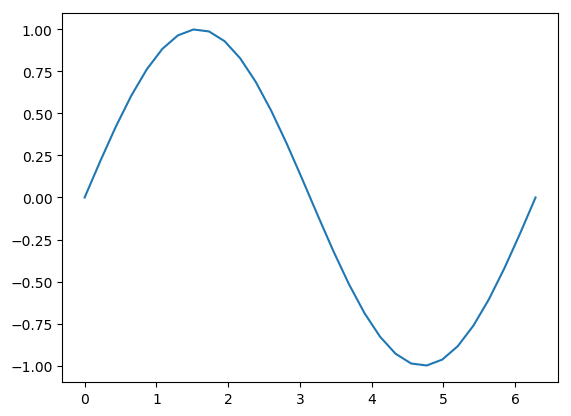

In [2]:
using PyPlot

x = linspace(0, 2π, 30)
plot(x, sin.(x));  # semi-colon supresses matplotlib text

typeof(ax) = Array{PyCall.PyObject,1}

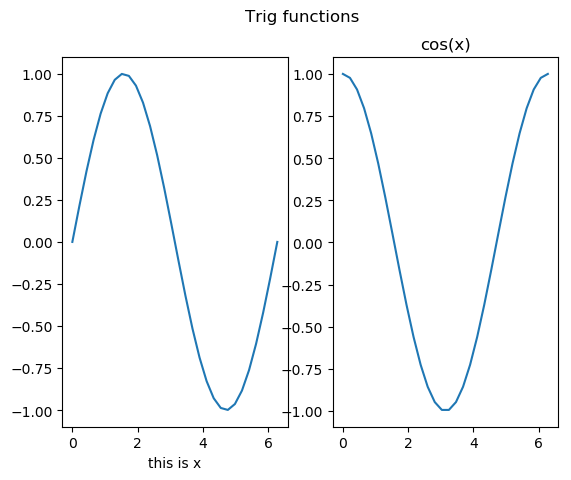

In [3]:
### using object API
# One row, two columns of subplots
fig, ax = subplots(1, 2)

# 1d array of matplotlib axes
@show typeof(ax)

# access methods of ax object using `[:name]` instead of `.name`

# plot on both axes
ax[1][:plot](x, sin.(x), label="sin")
ax[2][:plot](x, cos.(x), label="cos")

# set axes properties
ax[1][:set_xlabel]("this is x")
ax[2][:set_title]("cos(x)")

# set figure property
fig[:suptitle]("Trig functions");

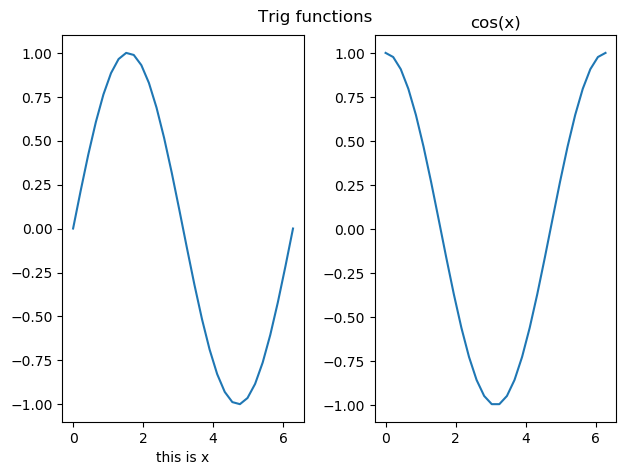

In [4]:
# fix spacing of axes labels
fig[:tight_layout]()

# display fig again by having it as last item in notebook cell
# (notice improved spacing)
fig 

### More than you need

- There are many matplotlib tutorials and examples online
- Any that use `matplotlib.pyplot` work with PyPlot.jl -- you just need to change `.stuff` to `[:stuff]`
- The ultimate reference for what is possible is the matplotlib documentation:
    - [API documentation](http://matplotlib.org/2.0.2/api/pyplot_summary.html) (Documentation for each function)
    - [Examples](http://matplotlib.org/2.0.2/examples/index.html)
    - [Gallery](http://matplotlib.org/2.0.2/gallery.html)
- Below are some examples (taken from [quantecon plotting lecture](https://lectures.quantecon.org/jl/julia_plots.html#pyplot))

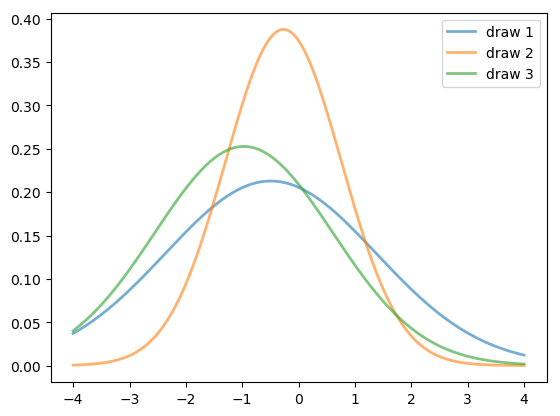

In [5]:
using Distributions

u = Uniform()

fig, ax = subplots()
x = linspace(-4, 4, 150)
for i in 1:3
    # == Compute normal pdf from randomly generated mean and std == #
    m, s = rand(u) * 2 - 1, rand(u) + 1
    d = Normal(m, s)
    y = pdf.(d, x)
    # == Plot current pdf == #
    ax[:plot](x, y, linewidth=2, alpha=0.6, label="draw $i")
end
ax[:legend]();

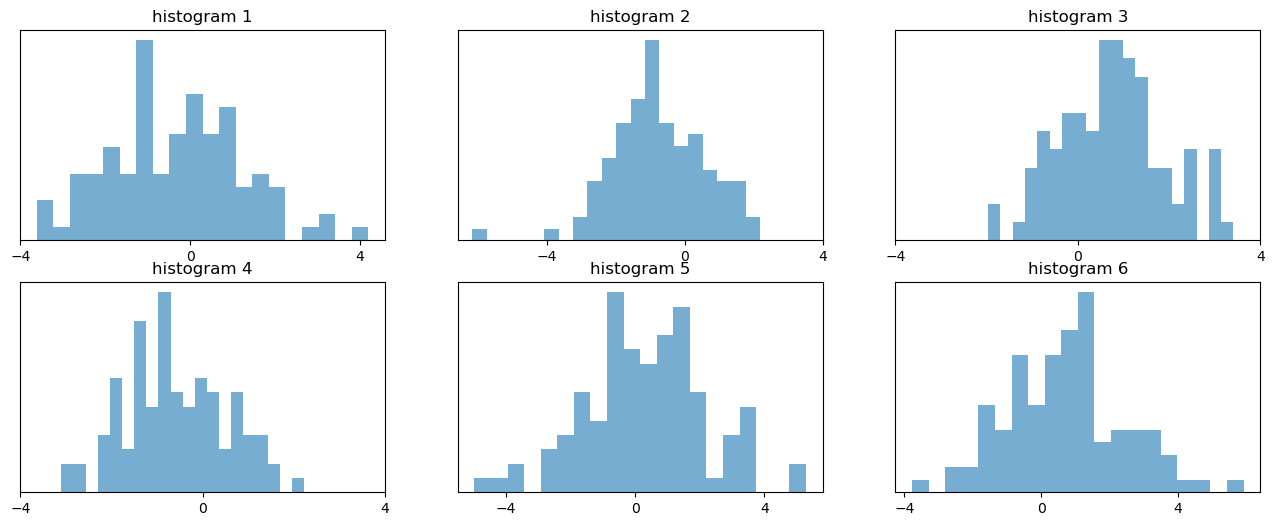

In [6]:
u = Uniform()
num_rows, num_cols = 2, 3
fig, axes = subplots(num_rows, num_cols, figsize=(16,6))
subplot_num = 0

for i in 1:num_rows
    for j in 1:num_cols
        ax = axes[i, j]
        subplot_num += 1
        # == Generate a normal sample with random mean and std == #
        m, s = rand(u) * 2 - 1, rand(u) + 1
        d = Normal(m, s)
        x = rand(d, 100)
        # == Histogram the sample == #
        ax[:hist](x, alpha=0.6, bins=20)
        ax[:set_title]("histogram $subplot_num")
        ax[:set_xticks]([-4, 0, 4])
        ax[:set_yticks]([])
    end
end

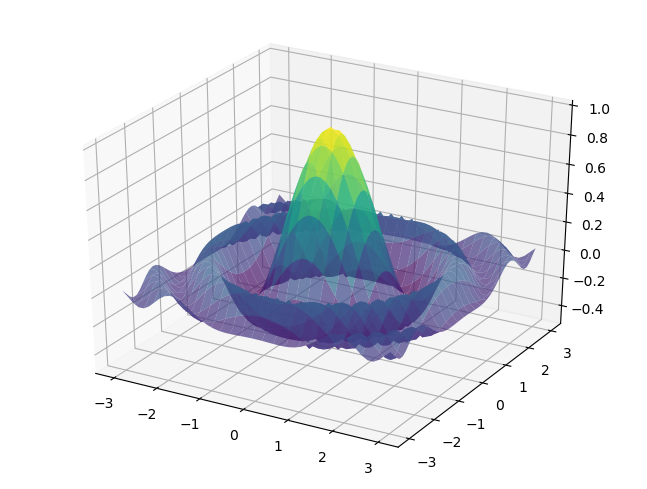

In [7]:
using QuantEcon: meshgrid

n = 50
x = linspace(-3, 3, n)
y = x

z = Array{Float64}(n, n)
f(x, y) = cos(x^2 + y^2) / (1 + x^2 + y^2)
for i in 1:n
    for j in 1:n
        z[j, i] = f(x[i], y[j])
    end
end

fig = figure(figsize=(8,6))
ax = fig[:gca](projection="3d")
ax[:set_zlim](-0.5, 1.0)
xgrid, ygrid = meshgrid(x, y)
ax[:plot_surface](
    xgrid, ygrid, z, rstride=2, cstride=2,
    cmap=ColorMap("viridis"), alpha=0.7, linewidth=0.25
);

In [8]:
# save the previous figure to pdf and eps
fig[:savefig]("3dplot.pdf")
fig[:savefig]("3dplot.eps")

## Plots.jl

- A unified API for a wide variety of plotting packages (e.g. PlotlyJS, PyPlot, GR)
- Pros:
    - Only one set of syntax to learn
    - Easy to use 
    - Comprehensive set of backends
- Cons:
    - No guarantee that all features of a given backend will work

In [9]:
# Pkg.add("Plots"); Pkg.add("GR")

### Plots.jl basics

The approach of Plots.jl is to

    1. provide a “frontend” plotting language
    2. render the plots by using one of several existing plotting libraries as “backends”

Plots.jl plotting commands are translated internally to commands understood by a selected plotting library. These underlying libraries, or backends, can be swapped easily. Each backend has a different look and a different set of capabilities.

For example, PyPlot, PlotlyJS, and GR are available backends for Plots.jl. For this section, we will mostly use the GR backend, as it has the fewest dependencies.

For complete documentation of Plots.jl check [here](http://docs.juliaplots.org/latest/).

**NOTE: restart notebook kernel here!!!**

Both Plots and PyPlot define functions with common names (e.g. `plot`, `scatter`, etc.) 

So that we can use Plots' without having to refer to them as `Plots.function_name` we will restart the notebook kernel (the Julia process backing the notebook)

To do this we go to the `Kernel` menu above and press `Restart`

In [1]:
using Plots
gr()

Plots.GRBackend()

In [2]:
# a simple plot
x = linspace(0, 2π, 60)
plot(x, sin.(x), title="sin")

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 0 
 
 
 1 
 
 
 2 
 
 
 3 
 
 
 4 
 
 
 5 
 
 
 6 
 
 
 -0.75 
 
 
 -0.50 
 
 
 -0.25 
 
 
 0.00 
 
 
 0.25 
 
 
 0.50 
 
 
 0.75 
 
 
 sin 
 
<polyline clip-path="url(#clip2602)" style="stroke:#009af9; stroke-width:1; stroke-opacity:1; fill:none" points="
 45.7332,203.655 54.7939,185.349 63.8546,167.25 72.9153,149.565 81.976,132.491 91.0368,116.225 100.097,100.949 109.158,86.8361 118.219,74.0472 127.28,62.7269 
 136.34,53.0033 145.401,44.9867 154.462,38.7678 163.522,34.4172 172.583,31.9841 181.644,31.4961 190.705,32.9587 199.765,36.3554 208.826,41.6476 217.887,48.7755 
 226.947,57.6582 236.008,68.1951 245.069,80.2668 254.129,93.7365 263.19,108.452 272.251,124.246 281.312,140.939 290.372,158.343 299.433,176.261 308.494,194.489 
 317.554,212.821 326.615,231.049 335.676,248.966 344.737,266.37 353.797,283.064 362.858,298.858 371.919,313.573 380.979,327.043 390.04,339.114 399.101,349.651 
 408.162,358.534 417.222,365.662 426.283,370.954 435.344,374.351 444.404,375.813 453.465,375.325 462.526,372.892 471.586,368.542 480.647,362.323 489.708,354.306 
 498.769,344.583 507.829,333.262 516.89,320.473 525.951,306.361 535.011,291.085 544.072,274.818 553.133,257.745 562.194,240.059 571.254,221.961 580.315,203.655 
 
 "/>
 
 
 
 
 y1

In [3]:
# We can also arrange multiple plots in a grid
using Distributions
draws = Array{Vector}(4)
titles = Array{String}(1, 4)
for i = 1:4
    m, s = 2*(rand() - 0.5), rand() + 1
    d = Normal(m, s)
    draws[i] = rand(d, 100)
    t = "mu = $(round(m, 2)), sigma = $(round(s, 2))"
    titles[i] = t
end

Plots.histogram(draws,
            layout=4,
            title=titles,
            legend=:none,
            titlefont=Plots.font(9),
            bins=20)


<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 -2 
 
 
 0 
 
 
 2 
 
 
 4 
 
 
 0 
 
 
 5 
 
 
 10 
 
 
 15 
 
 
 mu = -0.38, sigma = 1.18 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 -2 
 
 
 -1 
 
 
 0 
 
 
 1 
 
 
 2 
 
 
 3 
 
 
 0 
 
 
 5 
 
 
 10 
 
 
 15 
 
 
 20 
 
 
 25 
 
 
 mu = 0.1, sigma = 1.28 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 -4 
 
 
 -2 
 
 
 0 
 
 
 2 
 
 
 4 
 
 
 0 
 
 
 2 
 
 
 4 
 
 
 6 
 
 
 8 
 
 
 10 
 
 
 12 
 
 
 14 
 
 
 mu = -0.16, sigma = 1.75 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 -4 
 
 
 -2 
 
 
 0 
 
 
 2 
 
 
 4 
 
 
 0 
 
 
 2 
 
 
 4 
 
 
 6 
 
 
 8 
 
 
 10 
 
 
 12 
 
 
 mu = -0.28, sigma = 1.99

### More than you need

Check the Plots.jl documentation for more information about how to manipulate and create plots to your liking. To give a taste of what other types of plots can be made using Plots.jl, see below:

In [4]:
# a nice 3d plot
n = 100
ts = linspace(0,8π,n)
x = ts .* map(cos,ts)
y = (0.1ts) .* map(sin,ts)
z = 1:n
plot(x,y,z,zcolor=reverse(z),m=(10,0.8,:blues,stroke(0)),leg=false,cbar=true,w=5)
plot!(zeros(n),zeros(n),1:n,w=10)

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
<polyline clip-path="url(#clip3000)" style="stroke:#000000; stroke-width:1; stroke-opacity:1; fill:none" points="
 122.786,354.311 122.786,354.311 120.927,355.388 122.786,354.311 122.786,319.562 121.857,320.101 122.786,319.562 122.786,284.813 120.927,285.89 122.786,284.813 
 122.786,250.064 121.857,250.603 122.786,250.064 122.786,215.315 120.927,216.392 122.786,215.315 122.786,180.566 121.857,181.105 122.786,180.566 122.786,145.817 
 120.927,146.895 122.786,145.817 122.786,111.068 121.857,111.607 122.786,111.068 122.786,76.3192 120.927,77.3967 122.786,76.3192 
 "/>
 
 
 
 
 
 
 
 
 
 
 
<polyline clip-path="url(#clip3000)" style="stroke:#000000; stroke-width:1; stroke-opacity:1; fill:none" points="
 122.786,354.311 135.905,355.774 134.047,356.852 135.905,355.774 155.199,357.927 154.27,358.466 155.199,357.927 174.493,360.08 172.634,361.157 174.493,360.08 
 193.786,362.232 192.857,362.771 193.786,362.232 213.08,364.385 211.222,365.462 213.08,364.385 232.374,366.537 231.445,367.076 232.374,366.537 251.668,368.69 
 249.809,369.767 251.668,368.69 270.961,370.843 270.032,371.381 270.961,370.843 290.255,372.995 288.396,374.073 290.255,372.995 309.549,375.148 308.62,375.686 
 309.549,375.148 315.516,375.813 
 "/>
 
 
 
 
 
 
 
<polyline clip-path="url(#clip3000)" style="stroke:#000000; stroke-width:1; stroke-opacity:1; fill:none" points="
 315.516,375.813 327.225,369.025 331.08,369.455 327.225,369.025 339.171,362.1 341.098,362.315 339.171,362.1 351.117,355.174 354.972,355.604 351.117,355.174 
 363.063,348.249 364.991,348.464 363.063,348.249 375.009,341.323 378.864,341.753 375.009,341.323 386.955,334.398 388.883,334.613 386.955,334.398 398.901,327.472 
 402.756,327.902 398.901,327.472 410.848,320.547 412.775,320.762 410.848,320.547 422.794,313.621 426.648,314.051 422.794,313.621 426.788,311.305 
 "/>
<polyline clip-path="url(#clip3002)" style="stroke:#009af9; stroke-width:5; stroke-opacity:1; fill:none" points="
 272.574,259.007 273.674,257.634 274.876,256.076 275.956,254.346 276.701,252.482 276.924,250.54 276.489,248.591 275.325,246.711 273.441,244.978 270.926,243.461 
 267.944,242.213 264.73,241.264 261.564,240.62 258.753,240.256 256.605,240.119 255.399,240.129 255.359,240.185 256.629,240.173 259.258,239.972 263.184,239.467 
 268.234,238.557 274.131,237.164 280.506,235.242 286.922,232.783 292.905,229.82 297.976,226.427 301.693,222.715 303.678,218.827 303.66,214.932 301.495,211.206 
 297.186,207.829 290.892,204.965 282.928,202.751 273.745,201.286 263.908,200.621 254.062,200.754 244.888,201.627 237.059,203.124 231.186,205.081 227.777,207.294 
 227.194,209.528 229.622,211.539 235.043,213.083 243.236,213.939 253.776,213.92 266.058,212.895 279.332,210.793 292.747,207.614 305.406,203.432 316.426,198.392 
 324.999,192.704 330.452,186.628 332.294,180.464 330.262,174.527 324.342,169.129 314.783,164.557 302.086,161.055 286.983,158.801 270.391,157.898 253.361,158.361 
 237.007,160.113 222.437,162.991 210.676,166.748 202.593,171.074 198.843,175.608 199.81,179.965 205.578,183.761 215.915,186.636 230.277,188.279 247.838,188.456 
 267.534,187.019 288.131,183.924 308.298,179.237 326.698,173.129 342.072,165.872 353.326,157.818 359.609,149.384 360.377,141.023 355.433,133.193 344.954,126.332 
 329.484,120.822 309.911,116.968 287.414,114.973 263.394,114.922 239.387,116.775 216.963,120.366 197.628,125.411 182.718,131.523 173.312,138.236 170.151,145.035 
 173.583,151.386 183.533,156.774 199.497,160.735 220.564,162.889 245.471,162.964 272.676,160.82 300.453,156.459 327.003,150.028 350.57,141.813 369.555,132.221 
 
 "/>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
<image width="18" height="36

In [5]:
# a contour plot
x = 1:0.5:20
y = 1:0.5:10
f(x,y) = begin
        (3x + y ^ 2) * abs(sin(x) + cos(y))
    end
X = repmat(x',length(y),1)
Y = repmat(y,1,length(x))
Z = map(f,X,Y)
p1 = contour(x,y,f,fill=true)
p2 = contour(x,y,Z)
plot(p1,p2)

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 5 
 
 
 10 
 
 
 15 
 
 
 20 
 
 
 2 
 
 
 4 
 
 
 6 
 
 
 8 
 
 
 10 
 
 
<image width="191" height="364" xlink:href="data:;base64,
iVBORw0KGgoAAAANSUhEUgAAAL8AAAFsCAYAAACdN2gzAAAgAElEQVR4nOy9e58kuXEdeiKArJ7Z
pUhLtC91/dD3/1qWZdmW7hVJLXenKxNA+I94IJBV1TPcF1fqwv5qu6YflQkkEDhx4kSAgCKwRqgg
qiB+AdMGpgqmDSIDXa4Q6RDpABEKvWArX4Npw4W/xgf6NX43/gt+RR/wFW34Ty8FX1fC337s+LoO
/O2HV3y17fiqHvjrr7/Fh8sVv/71N7h8uKJeDly+/gTeGrZffQJfDkTjEW/7dx8wrhv2b7/COAra
vuGb3/8G1/2C33/za3w6Nvx/n77Gn44N37aC//264ZuD8E+vA9/2jv8j/4o/0Tf4E36P7/q/YEjD
kAOCoV9lgIhBKCBiMFWIDAgG2vikvzMOlPIVfn35b/iK/gO+wq/xO/ktfs0b/vZjxW82wX/+eOCv
toav64H/91ff4FcfPuG3f/17fPj6E77+7R9QvnpF/eqK8p8+gX5VgI8fgVqAywvkq68hdQPtV6Ad
9rUBrUP++U+QbxnHv/wV+qcX/Omf/gav337Ed58+4p/+8Df45vqC//Xd1/jmqPiH7zb86wH86RD8
z+NbfEPf4p/pf+BT/yP+dP17EDFABRv/CkwVlT8CwDIWQxqIGIVewFRRaEOhC35Fv8XfyX/Fb8oF
/+VjwV9tgv+wdfzd15/wm5dX/Ne//v/x9Vff4W/+9p9x+avvsP36W2x/9y3wm19h/D+/w/jq12i/
/W+Qr34HfPyPOueogrjqPKSK9t0/ANffo/zhf4Bfv0X9338P/PGPkD9ccfzjr3B88zX+8A+/w7d/
+hr/+C//EX98/YA/7i/4799+xL8ejL//duCPreG/0z/iwCuu+ITr+AZNrri2P0AwwHi2Z3un7Tn5
n+3dtufkf7Z3256T/9nebXtO/md7t+05+Z/t3bbn5H+2d9uek//Z3m2ry/wnxqP1QGCANAhC4BkM
AoPA9p/9iwACgezTGAIiAQP6lQaIJF5xDRKAxt3rR2MB0QBQ9O95fo5eV8DxHnYPejcset8MBhND
wIC8fbncfx0DPvVZ+01E2ldCXFvfy7xPHnr/LBq8YwDM9osMsRe42Pf9/Ui/Pz9LX9pf7zcBoHQP
RIi7JRQw6Rj4d7+o7zR/jyk/6zTGhOWZEq99noNT0qsuAS6iGeSCv+x3hRnEBH0EslyLz+8hMRfJ
+z1np/ZHAKb8zdNgiAyLcPbTYJR1MGgOh3+KTwJgfv25W0xE+5onAYA5EEB8T2QuPn/vX7XftoBs
8bPQ0medDL4A18X90/Z1PnyGLwa/p2yetA+g9aEINJKd+79+fl70ZTF0S7/xwKj9KJ1k+DqMxR+T
HfO1PHNennluFbROeJ8MIh1EHBNfB+a8CLL11wH5SzVerL8+iOXny3sfjDTR0SH2b0HXHeFed4ii
z9Oa+P/vt8UimlX8/h1F7I7nz9VJvy56/TehSgGRPSszXv7VJQ3ehrRp9OxWXfJRsKGg6tOOCTZ3
2/VeRV/AaScrEEqWP+0Ael8V4ArwBjGrD+b1c9PYruOs91QIKESoo6BTQUUNi5+H8tme7V22Sieb
mJtgPMTEeRtxTOXYmogSDlQrTEiW+eeCAhAwmQ9CefO37ZsY/c6tiAw1mXd+lv0dzv2maXED/+L7
wx7FuDbGZvkWw/Vg9+B0PY6vs+9EyfKDw7oL7sMdogmHM352GOl+BZl/M3fg9Hn8GT/uSxtx6tQt
5g//Er4jJV/N3nNCOovDS3TG/D22/jPk+Uu2cHj41PnlNbf96XgTWEi3f2KQrDhQoV4J7EunCeET
n6miYJuLyf2JDAEwJyLfWwAsxi/wfH1p323iP3T8Et6fvs70yO45unny38P9PnEYbGOYFjx80p0c
XiM2FP7QCbrUL+ovyJ1jjovdONXLHMjO/tnXWdsT9jzbu231bO19PTil+ZbFXym/stiVoPu+lEv8
EZtbAuDW+mVHVftQFgvv1h9YrWG2lhPmsdGnFLvMufl9LHTn5+jc79GWrT/tePryvk+qc2G10O8+
Z89lWK4TkNGvIwtx9ENgbTi87A7vg93BqN8bIsEhDwSFGBWEKhUdDYczdGm3r28Z/0c4MO6BVr5f
v4e/COvD0flbzDv/TbFQgTmhJ8tj/T09u0ztEqVYgU+FBev7ljvx/o/u45zgzhLnSLDvvPArNjA2
TVA6PVtdAG/QnIb9CzZUVDCUUfFYRo5p5NiGT1KHdpO9UR7/zPTcXrxAOEOf2/nq9O68h0R3hsG7
S3V+ZqLKXa9v8Q9SqMcc3sSz/gXYTw++6K3OwI8Pg+NXebDwzxbfad8balf8E+f1zp+YF8BPwn0/
aO7sky1OktOuZzfsWVv3qGwAYNrmPbuT77sdsmP5w2MaOZOLqEIeWv65i3rAdDrbuih1ByAU26UL
6o2v88T8z/Zu29sutwhmIOh2neRgj7IelLbZaXU5bY9vQQERAmTFozTuMBPjy7aTGfBwP0SDPcpa
bBiwnF15G/oteJ8mXeb7yByPye5kocgPsYjCdgWXN5y67lFOv47CEQn4FcGeiMKXCPbIydfxf99j
g/KucRPRzqzPvYAeC7BAl1sI8rj/RSnfYMUoPpfLlHcUVshbyf8NFJ5QV/tQlr7Vex1Vfl9sUIZB
nLkI8t+cw/w/d/NtT9+vtOfN72Ll+nMTGfchHrBMuIXrdrBHE/efMf9dmvMHNsXQKbzPq5wiqN2F
itSFX70owSmqG8+c6GYRhKMMjZQWFJSAVI63k9MZE388jmZbFDe0PY8w/xeOx6rrmXZC6e2V3/dW
szMHnPn8AWDYmNy3Bvcswhnv/xQT4EuaTghCdn4y139vQNY2oOjZJ0MJxy8HuBbMf6evcyIkYduP
3CbbMbGvTkQPOk6RF6U+AT7xu8U25p4ldKvrmlqmHNd4u//O80s4vPctvy8AdsxvwjYJYZtbfxVA
zkk/Fp6/JIe/EKOIGecQ9dltff/hfrZn+7fdbmEPATI6sCj8Hlv/X0pbBV4zqhsR3mB7KG3nie9f
+uZ9V8tPqCD26O5mEd6qrEe2ghn3Jijwo7XkSNxGuceMbCPtevFnCfAZ00VgyBhWj2kqWJUAPAke
Tzv8hHf5eivkcQv94/Q9Sz2ajUHi+h3upDEI2JOeeW43Qa6V6x0PnaAF94deeuLf6ej+ZSAPsMKv
PBBvhbwBxMRXZ/f0mUhhfpDSibawPODjfZ/38fNJm72tmN8WpyhcOwf2tI3TX2tbYjjTy7mz2FcD
tMocJs8fju8XNiFVo06HmZbPvZV25LmH8EPvPe9fril/tmf7iVvNq0HQY5XHDiADMLbnDH1y0Mdt
wi+1ZUv8kO1BgnkYS9+BafUJnAJcK+z5OZs7zvcZr7n1BzMjjEIVTBWCjiFTxiHS/EMBaXC45w4v
2Y5RpaISayApvZz1+bkbJcVoFjY6xVvAqAs393R4n+3ZUDOVdU/I9FYTGRDS4Ij+JxARDFF5zBBg
CNlL34u9xmCMri9ixuiakzvaiZNNtKC0oq9eMHrB6Iw+SnxmH6yfDb2+iN+DvSJZz+/2y2Xa2teB
YWM0SLSYq3+m9VFOfZf8GgwMgnS75wGQFaEFjC5sTZPIWtNCte0AxrBitQA6IJ0hrcT4+RiM9PL7
0DClQCAYZP0W7cfSFt9vpQQBz3Tr9hky+yo+zoSBU3+FIIMgnYHWQ